In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [3]:
df = pd.read_csv('US_Accidents_June20.csv')

In [4]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
len(df)

3513617

In [6]:
# convert start_time and end_time to datatypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
df = df[(df['Start_Time'] > '2016-03-01') &
                (df['Start_Time'] <= '2020-03-01')]

In [7]:
# Extract year, month, day, hour and weekday
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

In [8]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year,Day,Hour
count,2.350019e+06,3.151163e+06,3.151163e+06,3.151163e+06,801144.000000,801144.000000,3.151163e+06,1.116708e+06,3.091678e+06,1.294042e+06,3.088301e+06,3.100106e+06,3.082228e+06,2.706224e+06,1.143747e+06,3.151163e+06,3.151163e+06,3.151163e+06
mean,2.078995e+02,2.352779e+00,3.651408e+01,-9.566689e+01,37.625327,-100.899451,2.803909e-01,5.934091e+03,6.152103e+01,5.047568e+01,6.555130e+01,2.980479e+01,9.117075e+00,8.214921e+00,1.818908e-02,2.017928e+03,1.568889e+01,1.209577e+01
std,2.043839e+01,5.386477e-01,4.915405e+00,1.728610e+01,4.967423,18.417504,1.539517e+00,1.515107e+04,1.894492e+01,2.454329e+01,2.256033e+01,7.620938e-01,2.903929e+00,5.199021e+00,2.181823e-01,1.127241e+00,8.721883e+00,5.107536e+00
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,24.570110,-124.497829,0.000000e+00,0.000000e+00,-7.780000e+01,-6.590000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,1.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.358191e+01,-1.173733e+02,33.977337,-118.370770,0.000000e+00,8.490000e+02,4.900000e+01,3.200000e+01,4.900000e+01,2.980000e+01,1.000000e+01,4.600000e+00,0.000000e+00,2.017000e+03,8.000000e+00,8.000000e+00
50%,2.010000e+02,2.000000e+00,3.585825e+01,-9.100870e+01,37.867149,-97.302740,0.000000e+00,2.758000e+03,6.390000e+01,5.200000e+01,6.800000e+01,2.997000e+01,1.000000e+01,7.000000e+00,0.000000e+00,2.018000e+03,1.600000e+01,1.200000e+01
75%,2.010000e+02,3.000000e+00,4.039412e+01,-8.094768e+01,41.371576,-82.740105,1.000000e-02,7.076000e+03,7.590000e+01,7.100000e+01,8.500000e+01,3.011000e+01,1.000000e+01,1.040000e+01,0.000000e+00,2.019000e+03,2.300000e+01,1.600000e+01
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,49.075000,-67.109242,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,3.304000e+01,1.400000e+02,8.228000e+02,2.500000e+01,2.020000e+03,3.100000e+01,2.300000e+01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3151163 entries, 425 to 3513616
Data columns (total 54 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   TMC                    float64       
 3   Severity               int64         
 4   Start_Time             datetime64[ns]
 5   End_Time               datetime64[ns]
 6   Start_Lat              float64       
 7   Start_Lng              float64       
 8   End_Lat                float64       
 9   End_Lng                float64       
 10  Distance(mi)           float64       
 11  Description            object        
 12  Number                 float64       
 13  Street                 object        
 14  Side                   object        
 15  City                   object        
 16  County                 object        
 17  State                  object        
 18  Zipcode             

In [10]:
# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3151163 entries, 425 to 3513616
Data columns (total 55 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   TMC                    float64       
 3   Severity               int64         
 4   Start_Time             datetime64[ns]
 5   End_Time               datetime64[ns]
 6   Start_Lat              float64       
 7   Start_Lng              float64       
 8   End_Lat                float64       
 9   End_Lng                float64       
 10  Distance(mi)           float64       
 11  Description            object        
 12  Number                 float64       
 13  Street                 object        
 14  Side                   object        
 15  City                   object        
 16  County                 object        
 17  State                  object        
 18  Zipcode             

In [11]:
# Print time_duration information
print('Max time to clear an accident: {} minutes or {} hours or {} days; Min to clear an accident td: {} minutes.'.format(df[td].max(),round(df[td].max()/60), round(df[td].max()/60/24), df[td].min()))

Max time to clear an accident: 1421955.0 minutes or 23699 hours or 987 days; Min to clear an accident td: -34.0 minutes.


# Analysis Part

We will examine the impact of 3 groups of factors on accident severity: time, weather, and infrastructure.

Severity "a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay)." Here is the distribution of the severity values.

In [12]:
print(df["Severity"].value_counts())

2    2133333
3     920435
4      96208
1       1187
Name: Severity, dtype: int64


Check how the distribution of the severity.

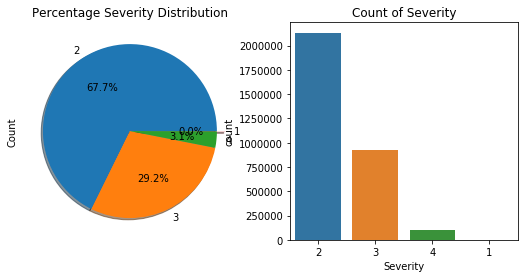

In [13]:
# Percent of severity
f,ax=plt.subplots(1,2,figsize=(9,4))
df['Severity'].value_counts().plot.pie(explode=[0,0,0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')
sns.countplot('Severity',data=df,ax=ax[1],order=df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

This distribution suggest that the majority of the severities of accidents are labeled as 2 or 3.

We can perform a heatmap to check which of the "float64" and "int64"(not dummy variables) columns are correlated with the severity the most.

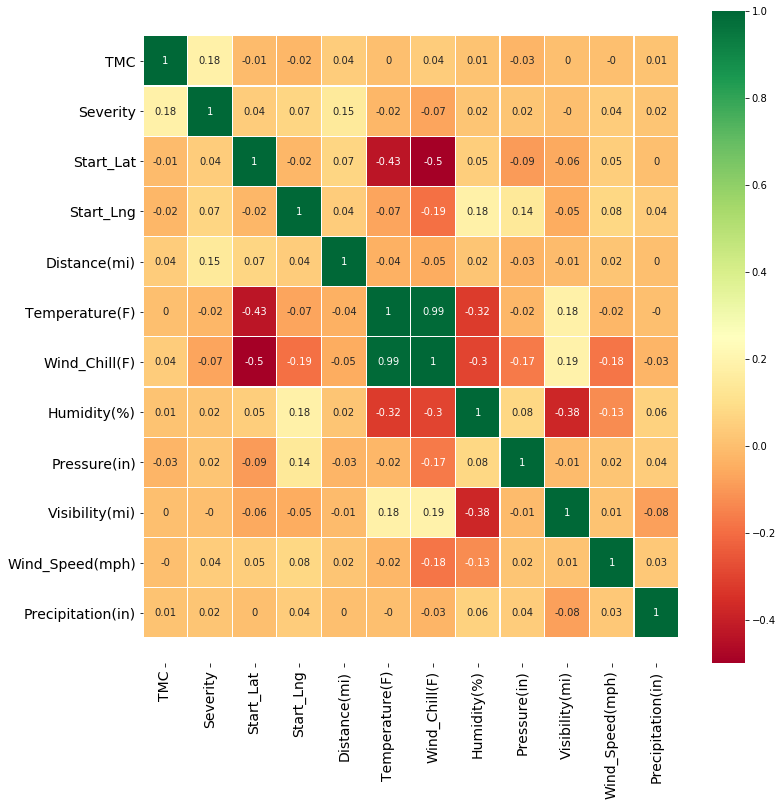

In [14]:
# Now we will make a HeatMap by using Seaborn Library
fig=sns.heatmap(df[['TMC','Severity','Start_Lat','Start_Lng','Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']].corr().round(2),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
# Seaborn Heatmap cuts the top and bottom rows to half,to fix the error, y_lims are changed
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

This heatmap does not suggest any strong correlation between a numerical variable and severity of an accident.

## What is the relationship between location and the severity of accidents?

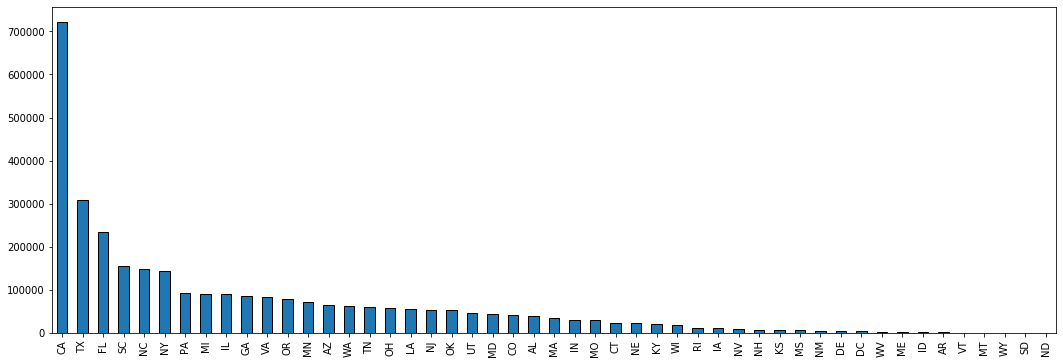

In [15]:
# Firstly, we will check the distribution of the accidents ove the states
plt.figure(figsize=(18,6))
df['State'].value_counts().plot(kind='bar', edgecolor = 'k')

We can observe from this graph that the number of accidents significantly differ from state to state. However, the other part of the question is whether the severity of an accident is associated with the state or not. In order to answer this question, we will check the distribution of the severities of the accidents in 10 states with the highest number of accidents.

In [16]:
df.State.value_counts().head(10)

CA    720775
TX    309763
FL    234311
SC    156240
NC    148197
NY    144018
PA     93733
MI     91683
IL     89870
GA     86864
Name: State, dtype: int64

Text(0, 0.5, '')

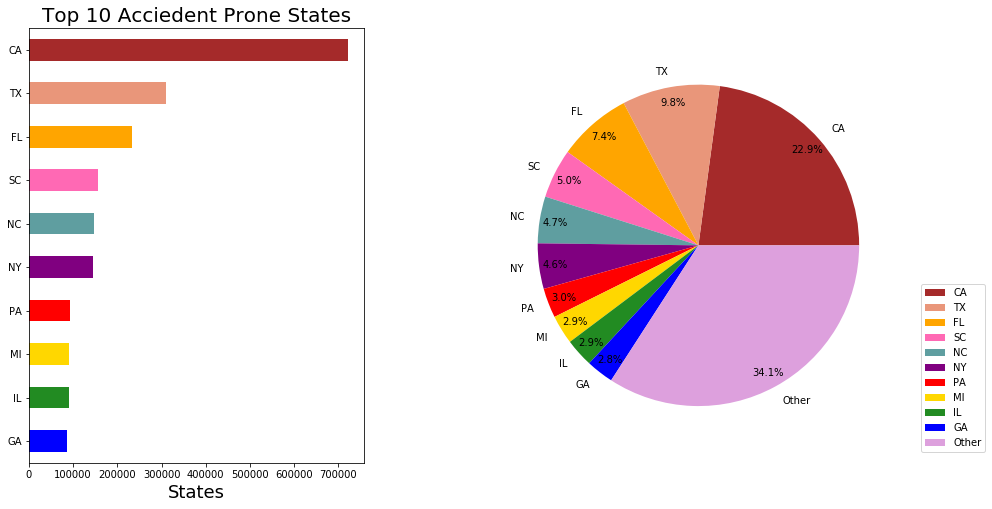

In [17]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.State.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 Acciedent Prone States",size=20)
ax[0].set_xlabel('States',size=18)


count=df['State'].value_counts()
groups=list(df['State'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')

We can see that more accidents are happening in state of California(CA), Texas(TX) and Florida(FL)

In [18]:
df_top_Severity_State = df.groupby('State').agg({'Severity': 'mean'}).sort_values('Severity').reset_index()

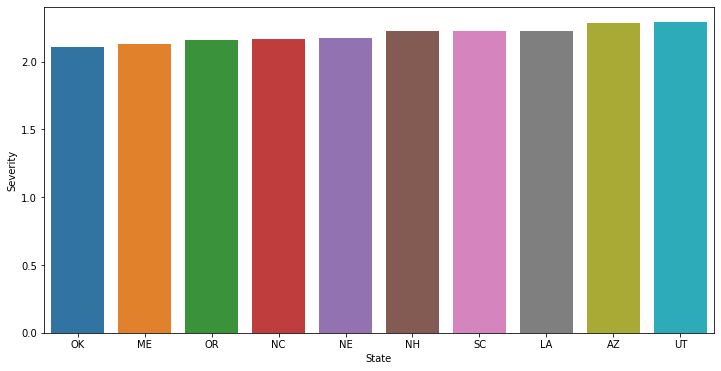

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(y="Severity", x="State", data=df_top_Severity_State.head(10))
plt.ioff()

We can see UT, NH and LA have the accidents with high severity

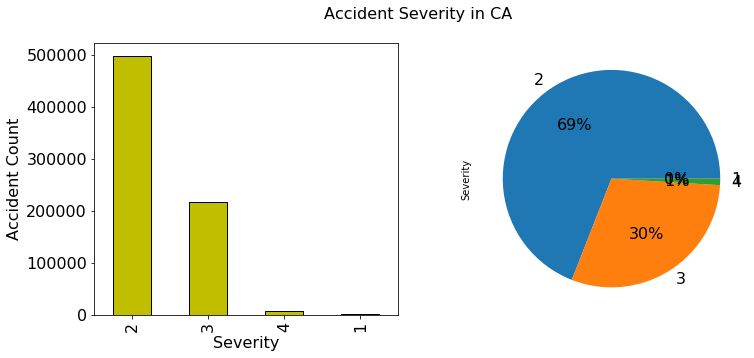

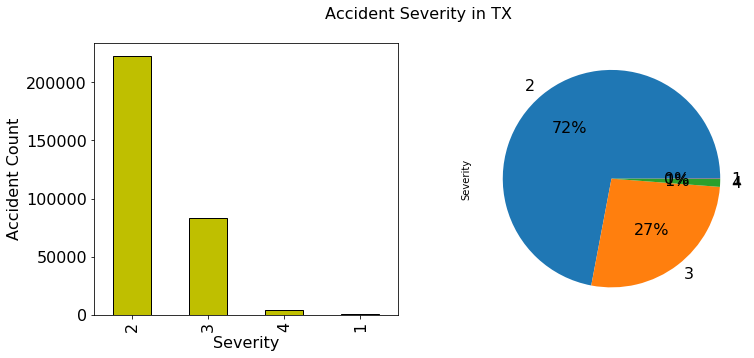

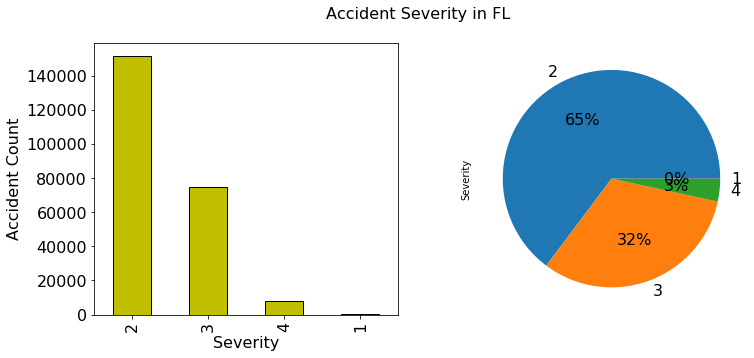

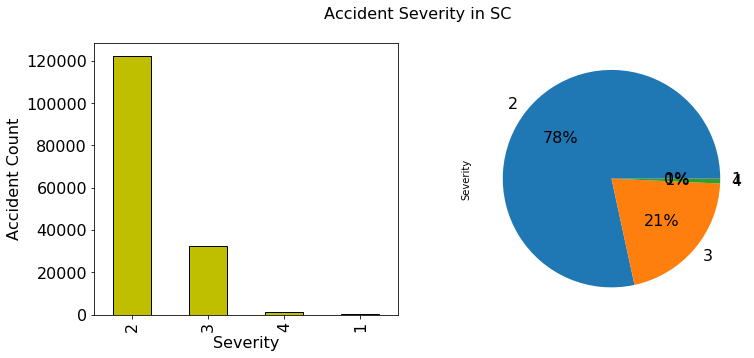

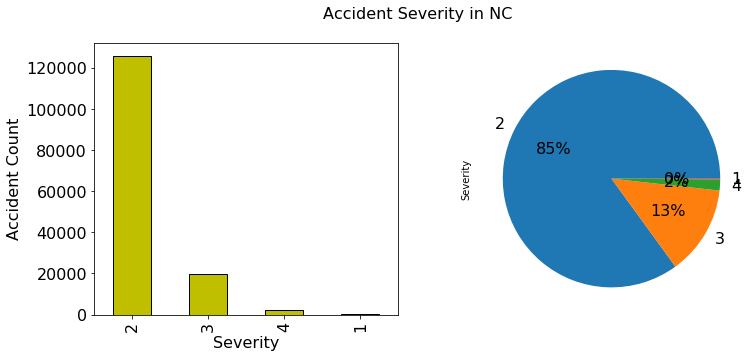

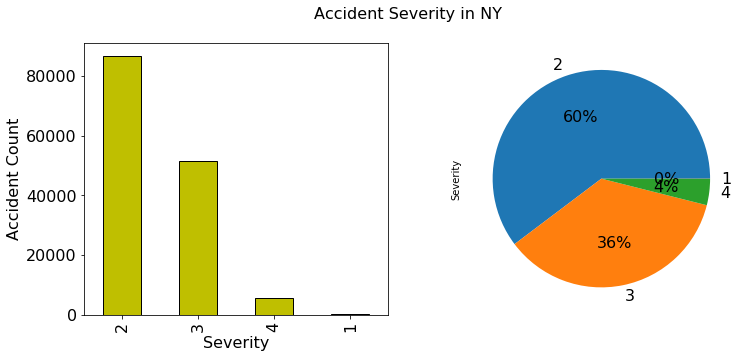

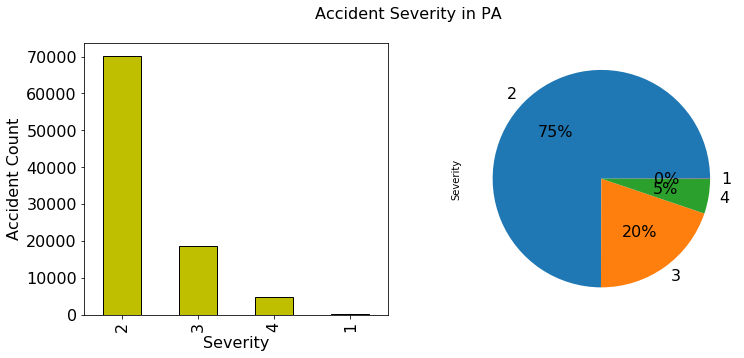

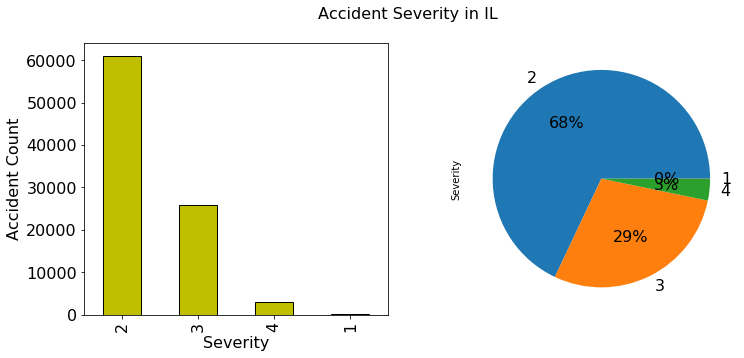

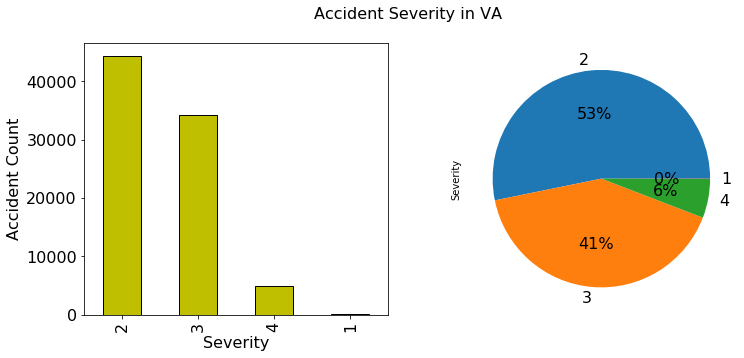

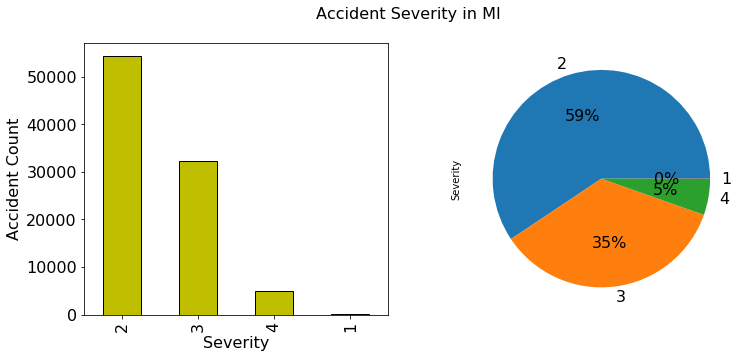

In [20]:
# We will draw pieplots and barplots for the distributions of severities in each of these 10 states.
# We will perform a for loop to choose the date for these states
for s in ["CA","TX", "FL","SC","NC","NY", "PA","IL","VA","MI"]:
    plt.subplots(1,2,figsize=(12,5))
    plt.suptitle('Accident Severity in ' + s,fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["State"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["State"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

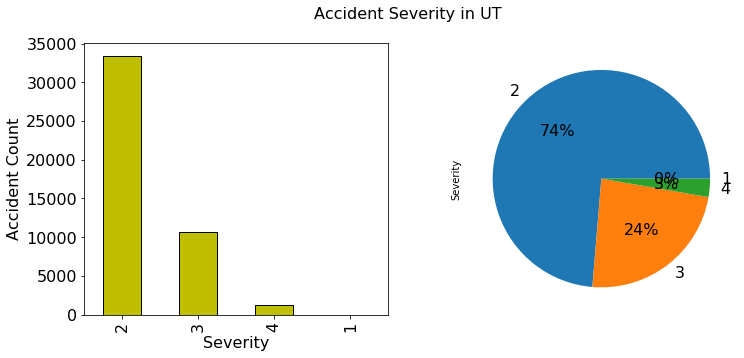

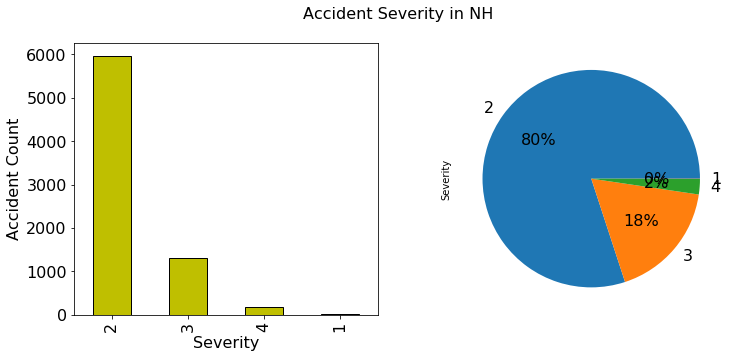

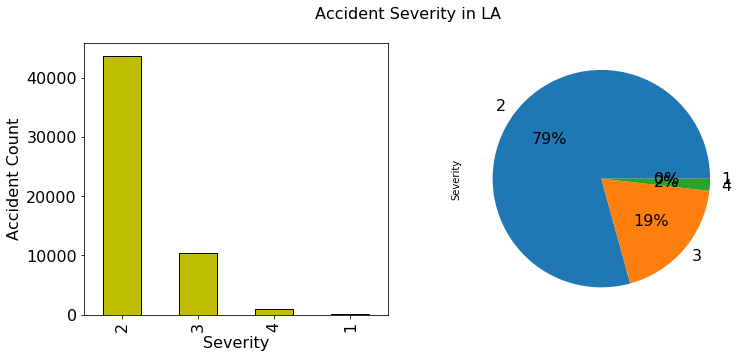

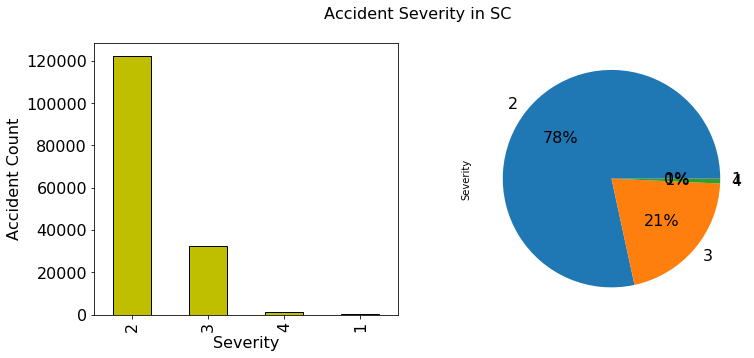

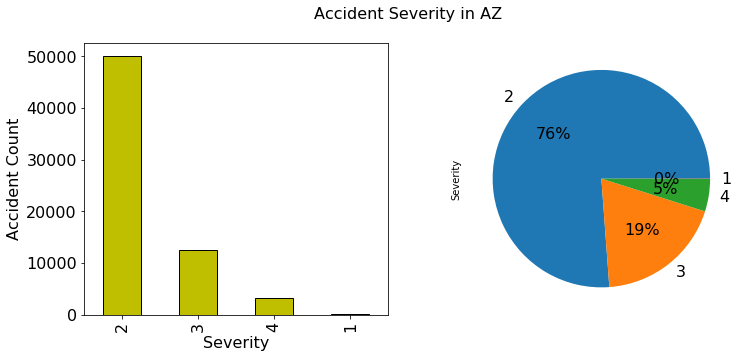

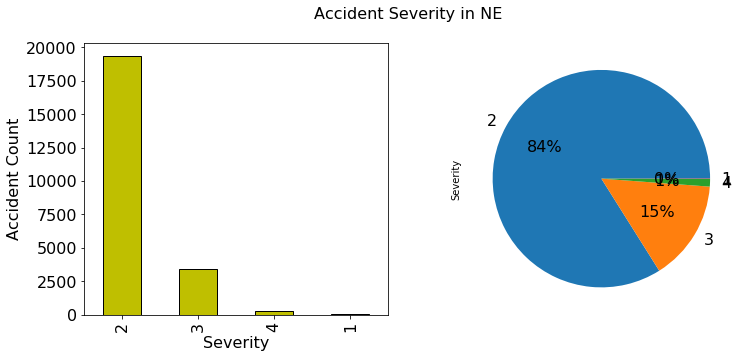

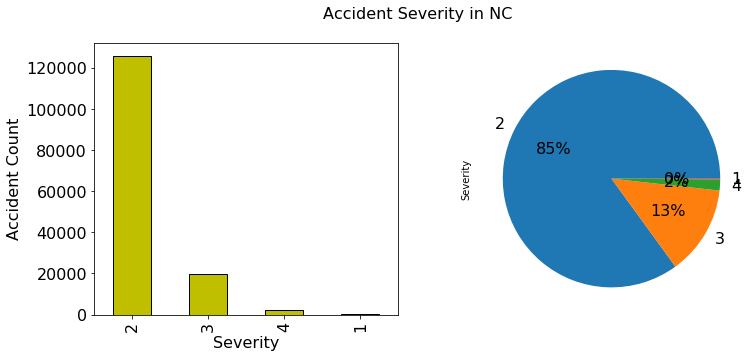

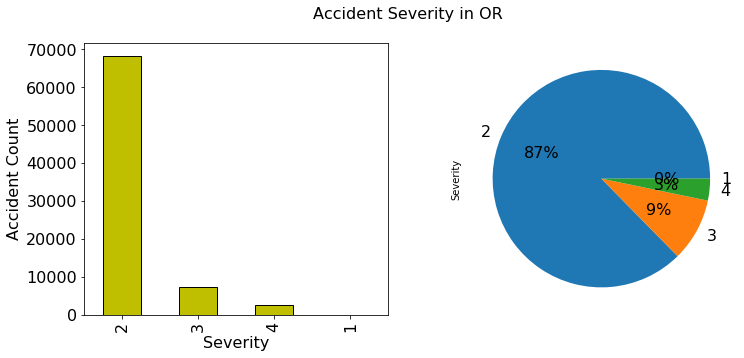

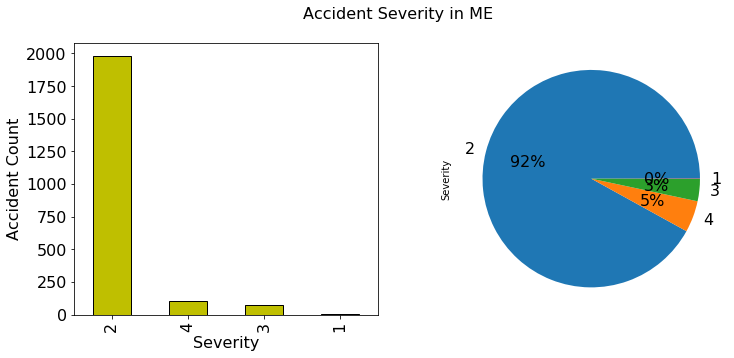

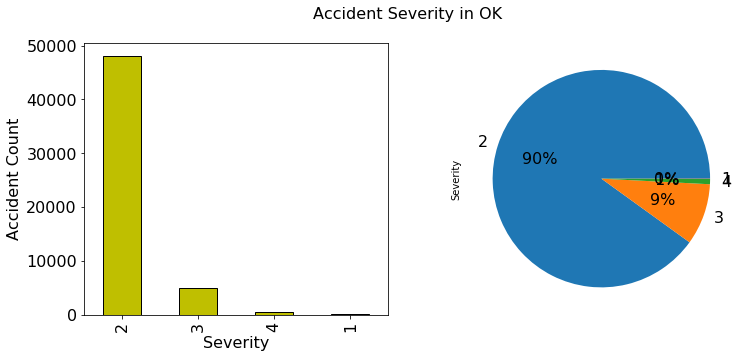

In [21]:
# We will draw pieplots and barplots for the distributions of severities in each of these 10 states.
# We will perform a for loop to choose the date for these states
for s in ["UT","NH", "LA","SC","AZ","NE", "NC","OR","ME","OK"]:
    plt.subplots(1,2,figsize=(12,5))
    plt.suptitle('Accident Severity in ' + s,fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["State"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["State"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

These graphs clearly state that the severity distribution differs from state to state. So state is a variable that may affect the severity of an accident.

Severity is a discrete numerical variable in ordinal level, so mean severity may have meaning in the context:

In [22]:
# We will define the top severity state by getting the mean of the severities of each states
df_top_Severity_State = df.groupby('State').agg({'Severity': 'mean'}).sort_values('Severity').reset_index()

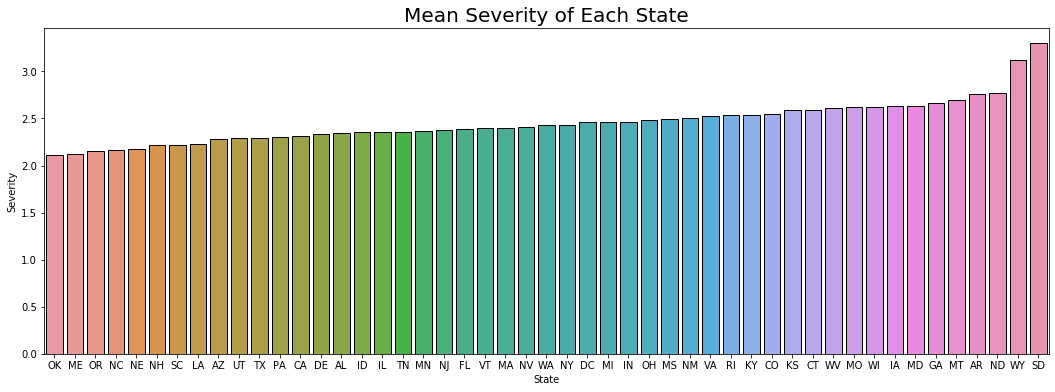

In [23]:
# Now we can show the mean severities of each state on a bar graph
plt.figure(figsize=(18,6))
sns.barplot(y="Severity", x="State", data=df_top_Severity_State,edgecolor='k')
plt.title("Mean Severity of Each State", fontsize=20)
plt.show()

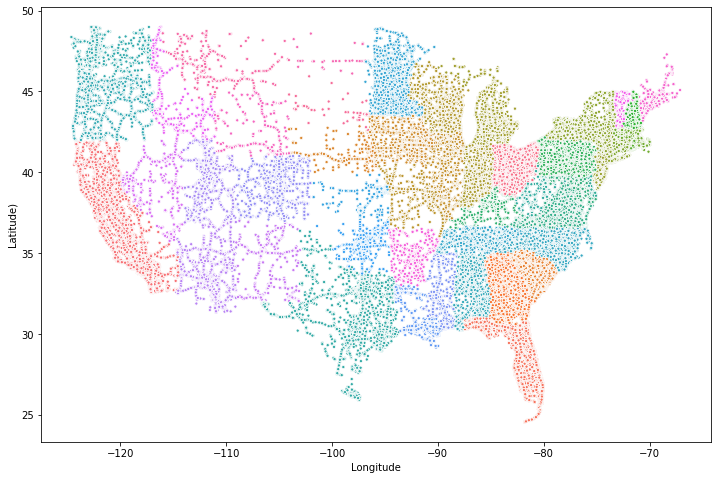

In [24]:
# Let'scheck the accident data on a map by coloring each state with a different color
plt.figure(figsize=(12,8))
sns.scatterplot(x='Start_Lng', y='Start_Lat',hue='State', data=df, s=10, legend = False)
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

Even though this graph can shows the distribution of the accidents in each state, it does not clearly shows the clusters.

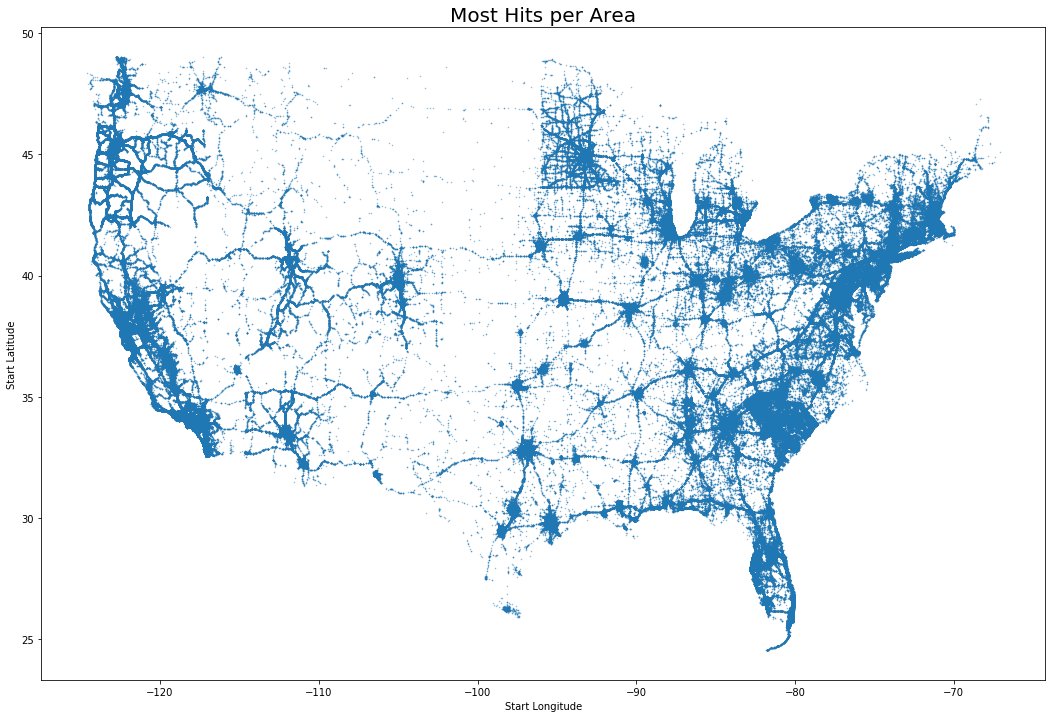

In [25]:
# If we remove 'hue'=State, we can observe which areas and which roads have more accidents than the others
plt.figure(figsize=(18,12))
plt.title('Most Hits per Area', fontsize=20)
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.plot(df.Start_Lng, df.Start_Lat, ".", alpha=0.5, ms=1)
plt.show()

The graph above shows all the accidents in the USA, and we can easily see that the accidents are clustered in metropolitan areas and major highways. However, it does not indicate the severity of accidents.

In order to show the severity of an accident, we choose the State of Texas to see how more severe accidents are clustered:

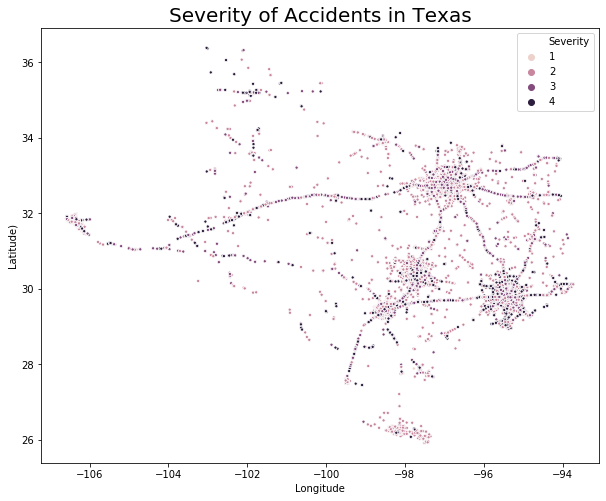

In [26]:
# Here we can see the map of the severity of the accidents in Texas colorcoded with the severity of the accidents
plt.figure(figsize=(10,8))
sns.scatterplot(x='Start_Lng', y='Start_Lat',hue='Severity', data=df.loc[df.State=='TX'], s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.title('Severity of Accidents in Texas', fontsize=20)
plt.show()

We can perform a similar scatter plots to see the distibution of severities of accidents in each city. I chose Los Angeles, since Los Angeles is a unique name for Los Angeles, CA in this dataset

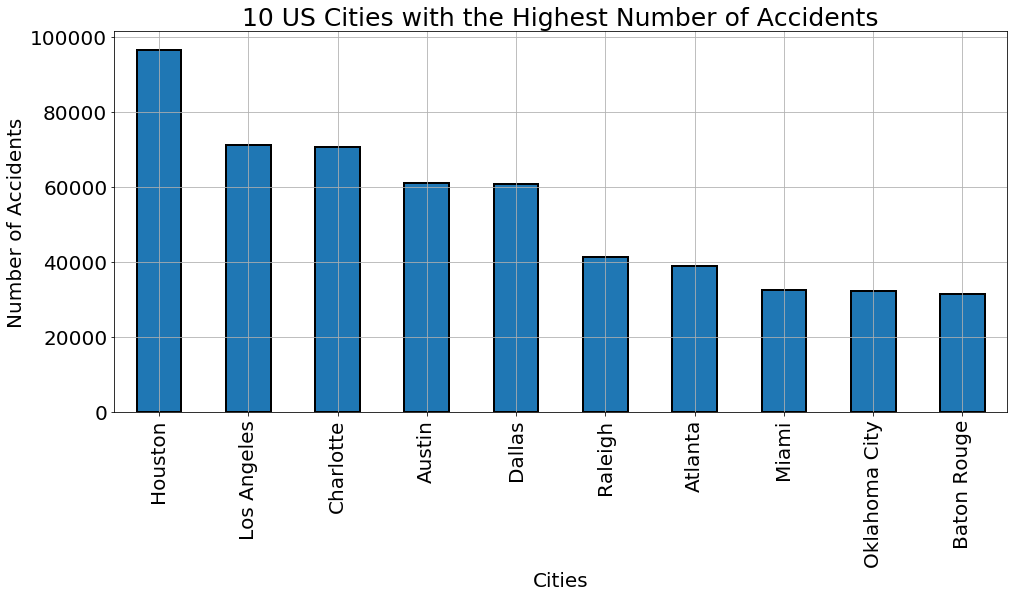

In [27]:
# Now, we will plot a bar plot to visualize to see which cities have the highest number of accidents
top_ten_cities = df['City'].value_counts().head(10)
fig, ax=plt.subplots(figsize=(16,7))
top_ten_cities.plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Cities',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('10 US Cities with the Highest Number of Accidents',fontsize=25)
plt.grid()

Now, we will check which cities have the highest mean of severities. One of the problem is many cities have only one car accident data, and if their accident's severity is 4, their mean will be 4, which will be misleading. We will sort the cities which has more than 100 car accidents to see which cities have a high number of accidents with a high mean severity.

Text(0.5, 1.0, 'Top 20 Cities with Highest Mean Severities')

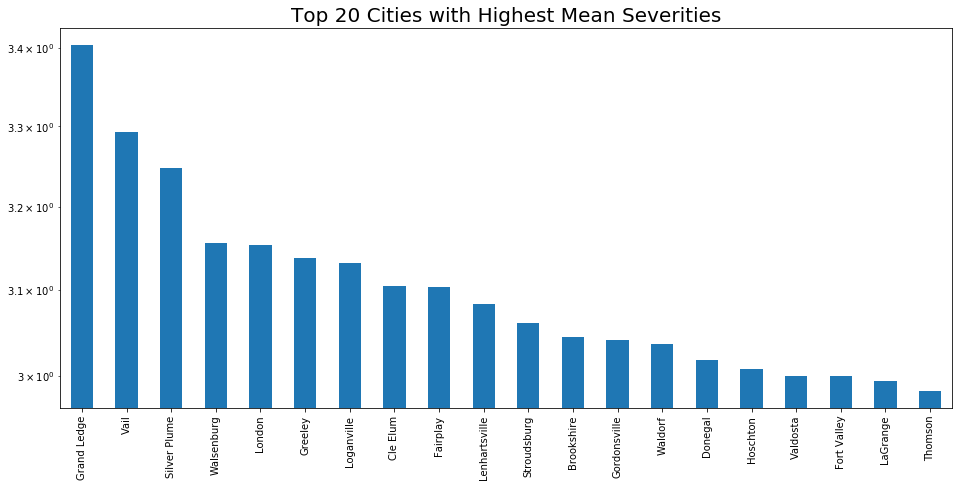

In [28]:
# Sort the cities according to the amount of accidents
city_vals = df['City'].value_counts()
# Choose the cities with more than 100 accidents
big_cities = city_vals.index.values[city_vals>100]
df_top_Severity_City = df.groupby('City').agg({'Severity': 'mean'})

# Create a dictionary with city as a key and mean severity as values
big_city_severities ={}
for city, row in df_top_Severity_City.iterrows():
    if city in big_cities:
        big_city_severities[city] = row['Severity'] 
        
# Convert the dictionary to Pandas Series
x = pd.Series(big_city_severities)

#Plot the graph. We will use logyscale since the mean values are preety close to each other
fig, ax=plt.subplots(figsize=(16,7))
x.sort_values(ascending = False).head(20).plot(kind = 'bar', logy=True)
plt.title("Top 20 Cities with Highest Mean Severities", fontsize=20)

## Time

### By Year

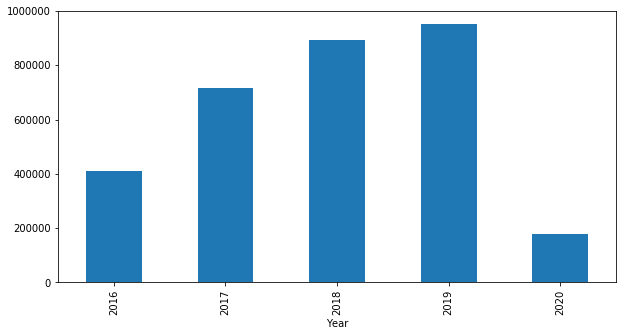

In [29]:
plt.figure(figsize =(10,5))
df.groupby(['Year']).size().plot.bar()

### By Month

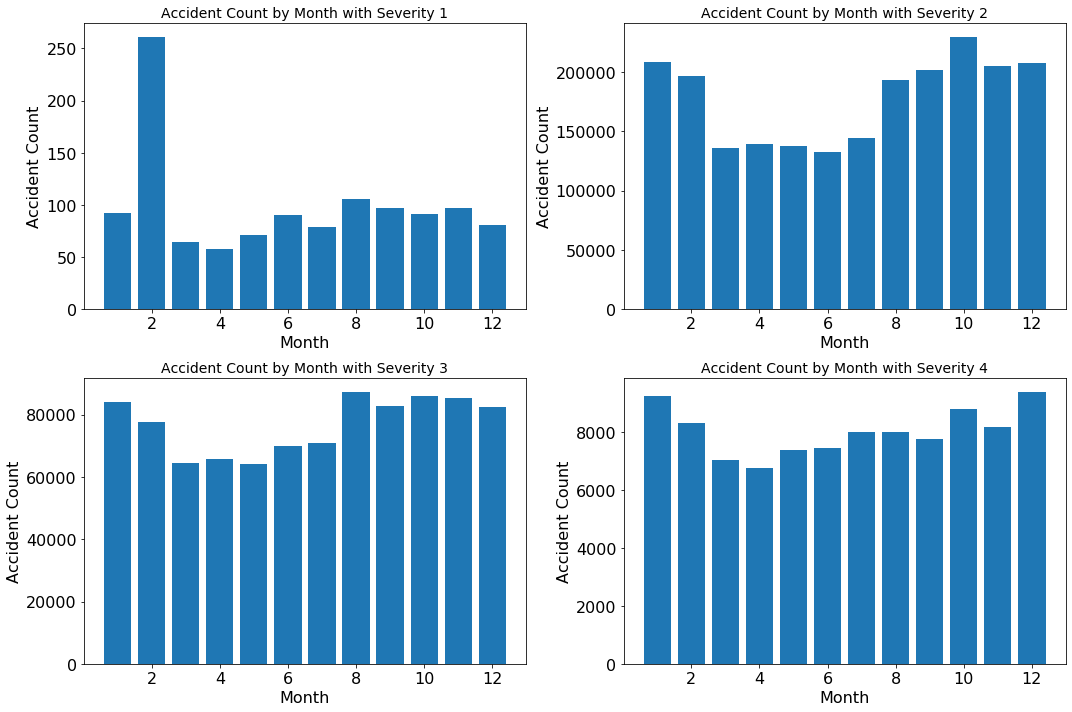

In [30]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')

plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(df.loc[df["Severity"] == s]['time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8)
    plt.title("Accident Count by Month with Severity " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

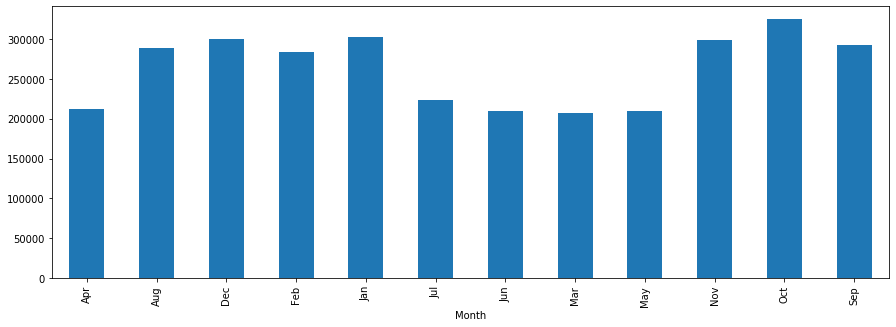

In [31]:
plt.figure(figsize =(15,5))
df.groupby(['Month']).size().plot.bar()

### By Day

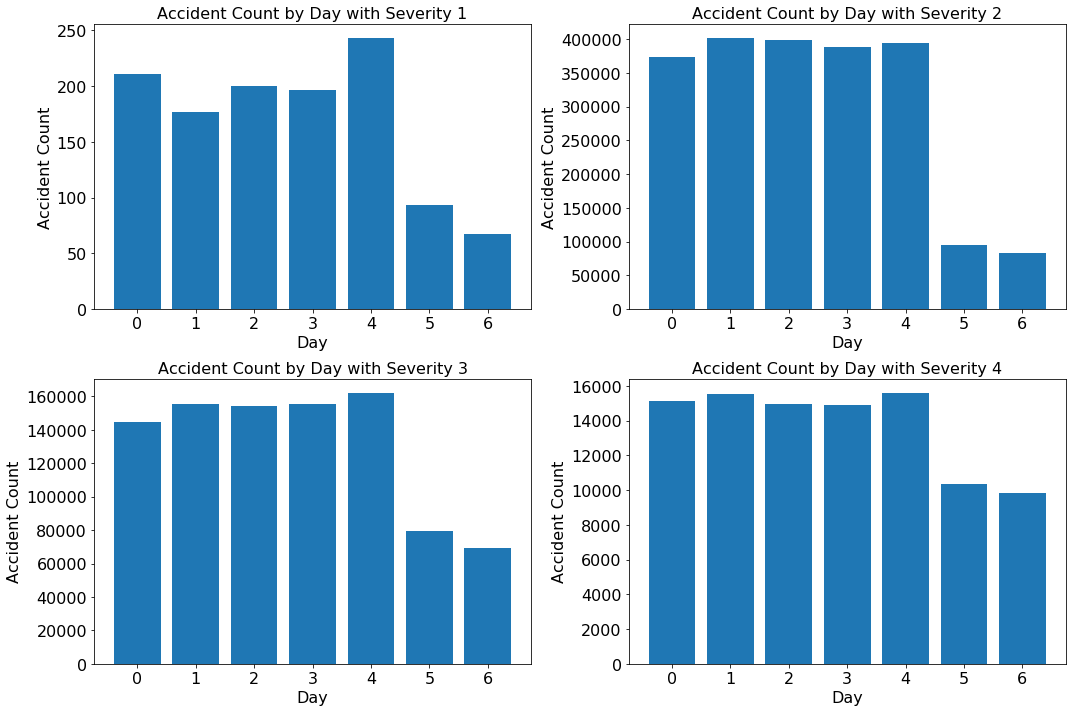

In [32]:
df['DayOfWeek'] = df['time'].dt.dayofweek
plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(df.loc[df["Severity"] == s]['DayOfWeek'], bins=[0,1,2,3,4,5,6,7], align='left', rwidth=0.8)
    plt.title("Accident Count by Day with Severity " + str(s), fontsize=16)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

There is a drop in the number of accidents for all severity levels during the weekend. Although, the relative drop for level 3 and 4 is smaller.

## Weather

### Most Frequent Weather Conditions

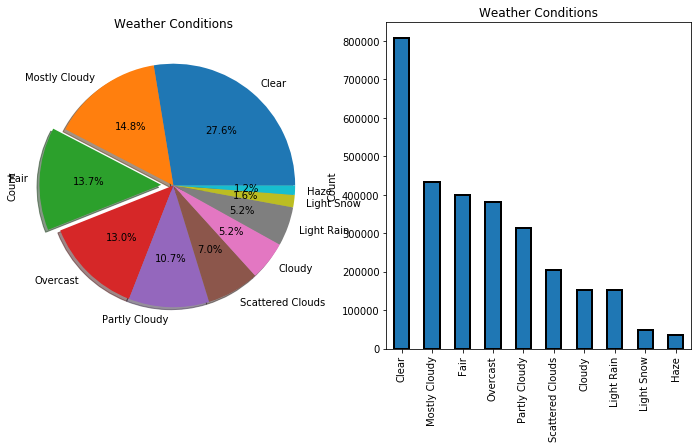

In [33]:
# Top 10 Accident conditions
f,ax=plt.subplots(1,2,figsize=(12,6))
df_top_weather_conditions = df.groupby('Weather_Condition').size().sort_values(ascending=False).iloc[:10]
df_top_weather_conditions.plot.pie(explode=[0,0,0.1,0,0,0,0,0,0,0],ax=ax[0],autopct='%1.1f%%',shadow=True)
ax[0].set_title('Weather Conditions')
ax[0].set_ylabel('Count')
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,ax=ax[1],edgecolor='k',align='center',linewidth=2)
ax[1].set_title('Weather Conditions')
ax[1].set_ylabel('Count')
plt.show()

In [34]:
# This table shows the number of accidents for each conditions
pd.DataFrame(df_top_weather_conditions) 

,0
Weather_Condition,
Clear,808031
Mostly Cloudy,432967
Fair,399987
Overcast,382168
Partly Cloudy,312604
Scattered Clouds,204608
Cloudy,152474
Light Rain,151765
Light Snow,48085


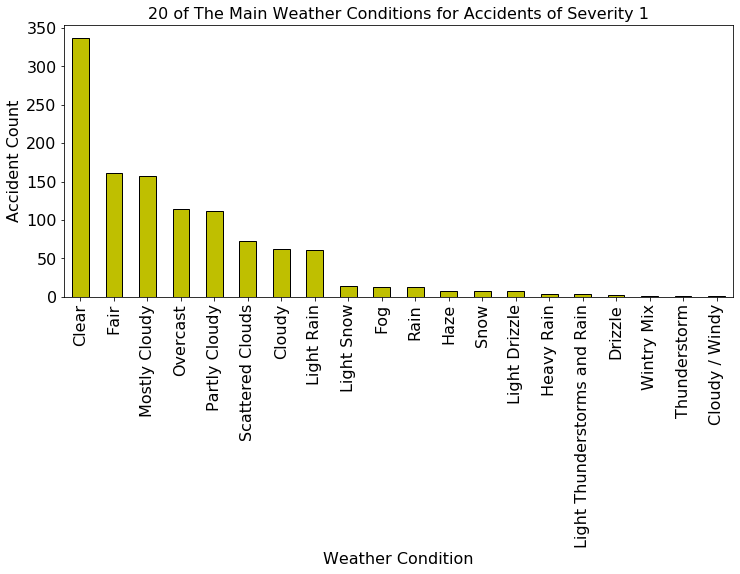

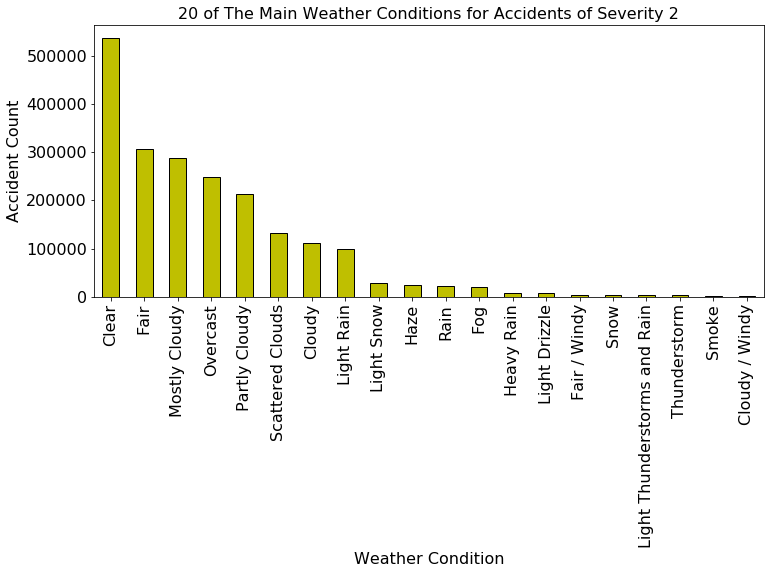

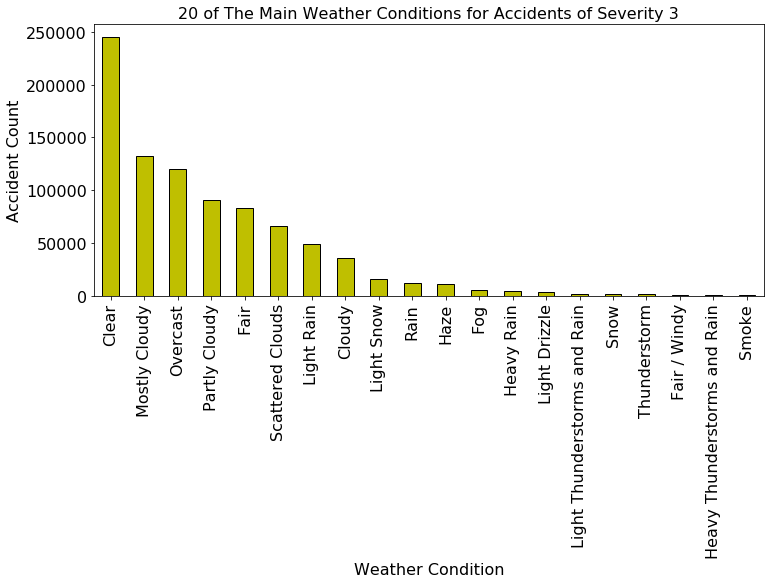

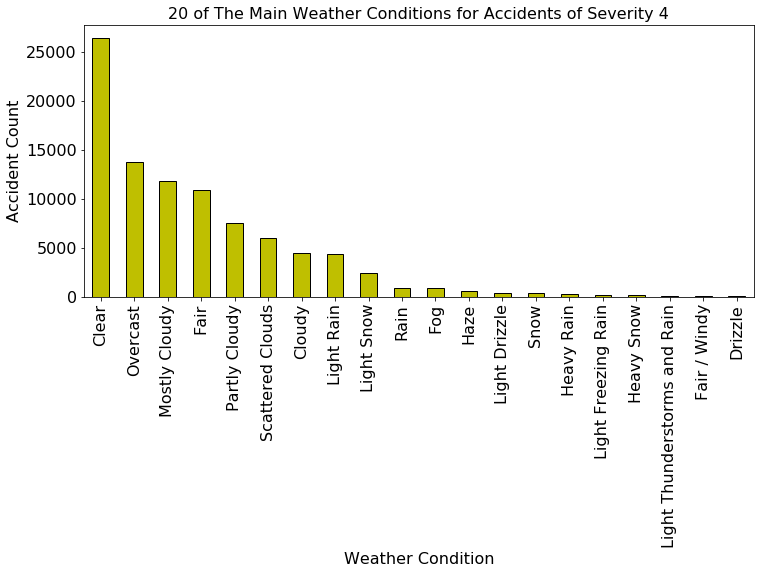

In [35]:
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    df.loc[df["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

Across all levels of severity, most accidents happen under clear, cloudy, fair or similar weather conditions. These conditions are considered benign compared to rain and snow, Perhaps they are the most frequent conditions. Light rain and light snow are the top adverse weather conditions. Most likely these cause accidents since they can make roads slippery without causing concern in the drivers.



### Severity under each condition

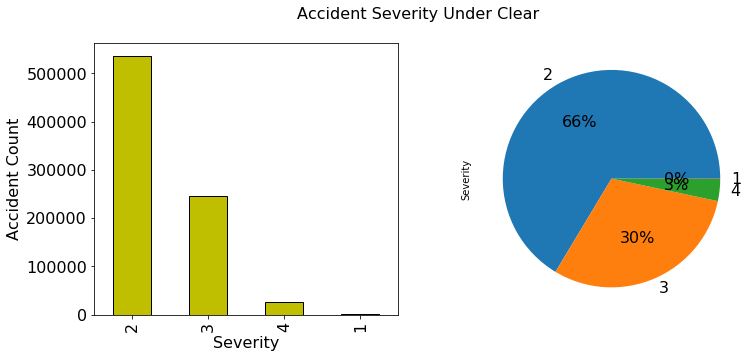

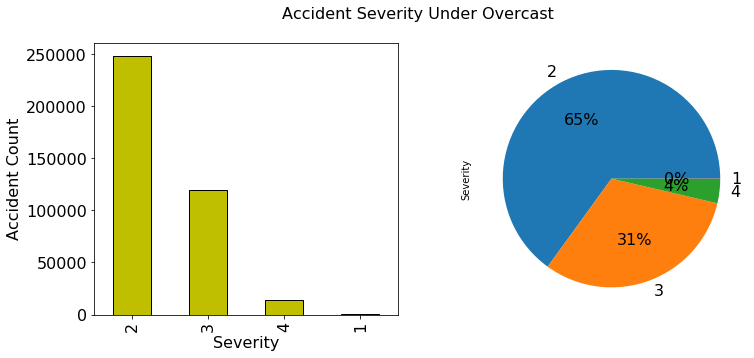

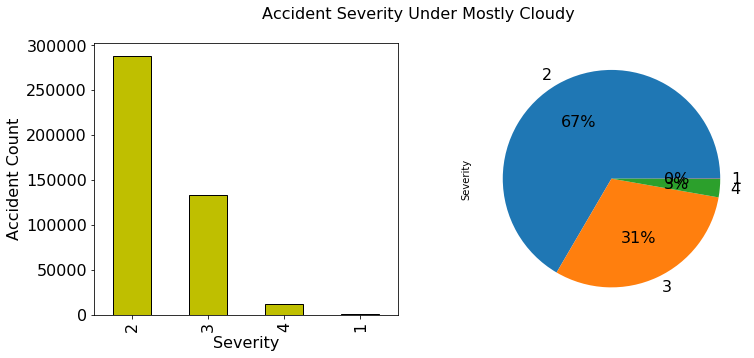

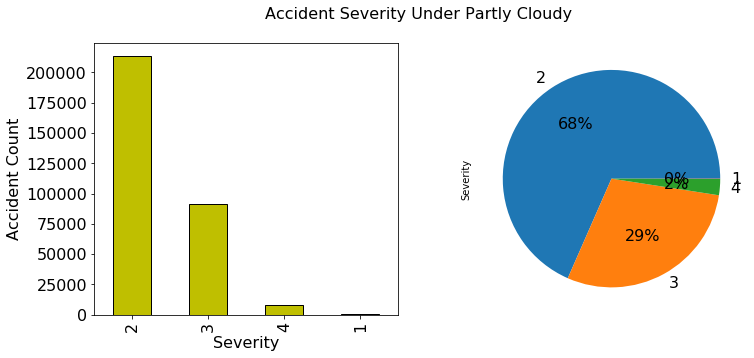

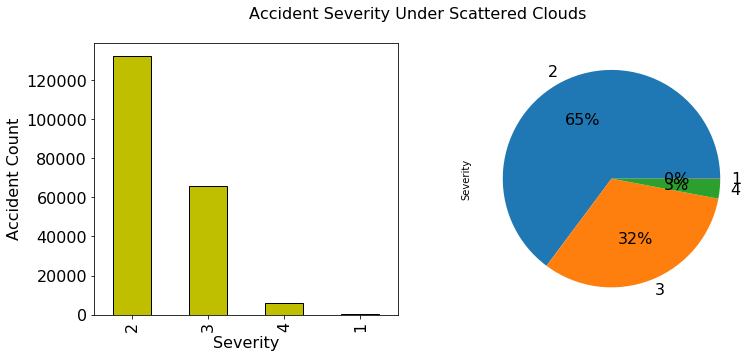

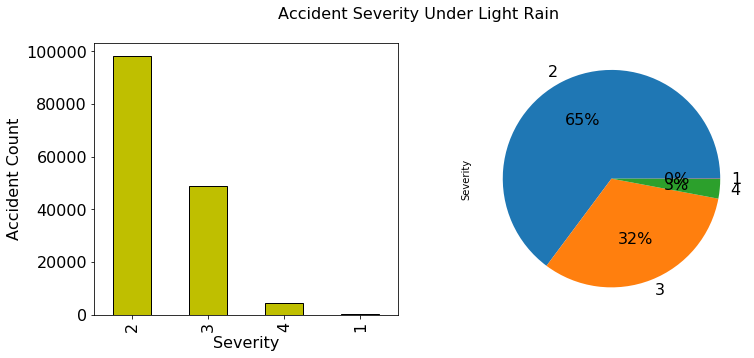

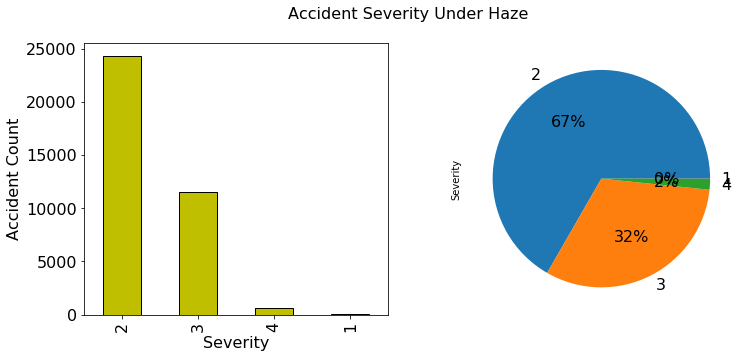

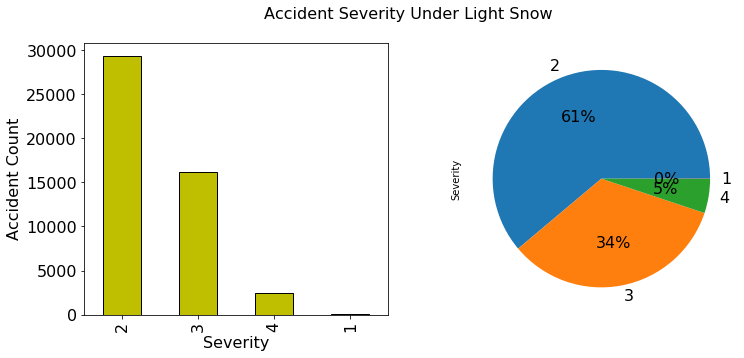

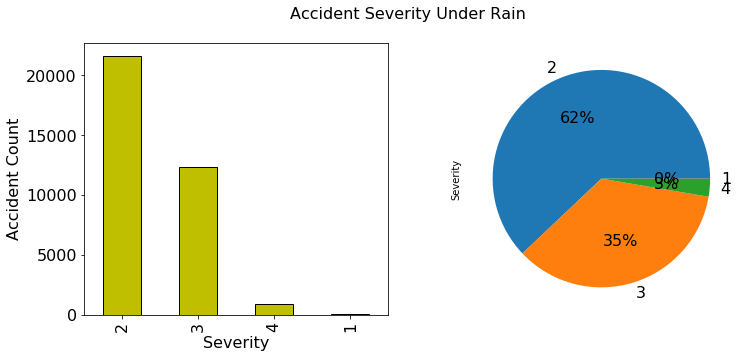

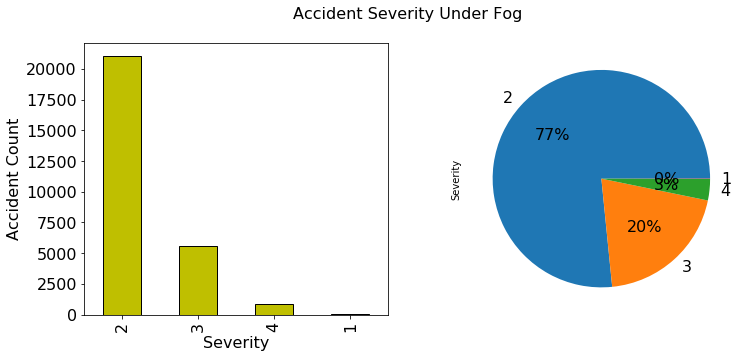

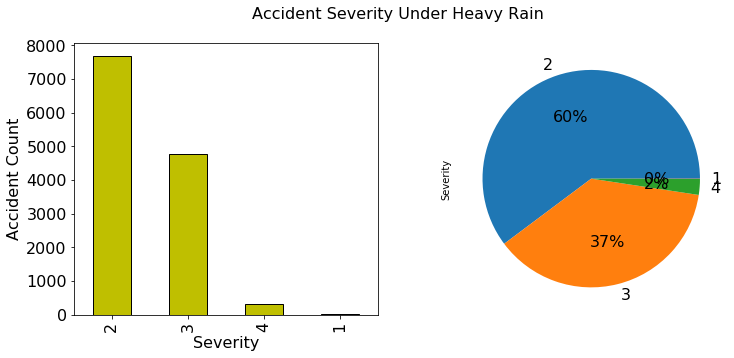

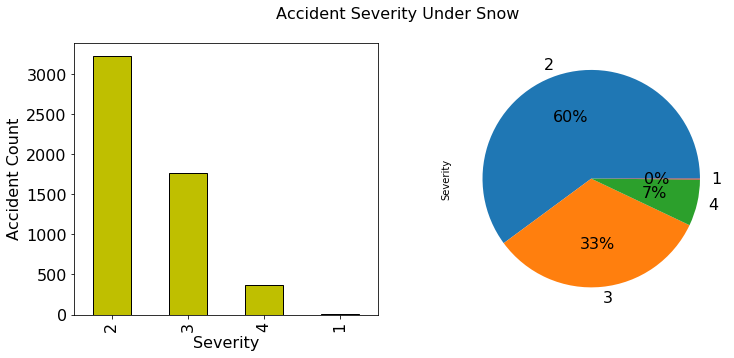

In [36]:
# We will perform a for loop to plot one pieplot and one bar plot for each conditions
for s in ["Clear","Overcast","Mostly Cloudy","Partly Cloudy","Scattered Clouds","Light Rain","Haze","Light Snow","Rain","Fog","Heavy Rain","Snow"]:
    plt.subplots(1,2,figsize=(12,5))
    plt.suptitle('Accident Severity Under ' + s,fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

These graphs suggest that the waether conditions have a significant impact on severity of an accident.

The proportion of level 3 and 4 accidents increases as weather changes from fog (23%) to light rain (34%) to rain (37%) to heavy rain (39%) to snow (39%).

### Other Weather Factors

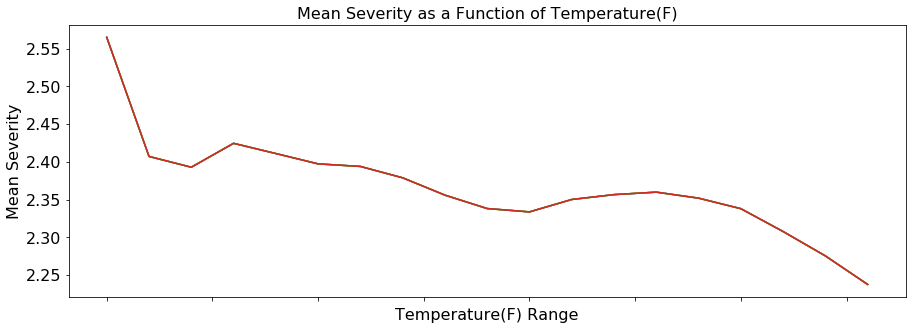

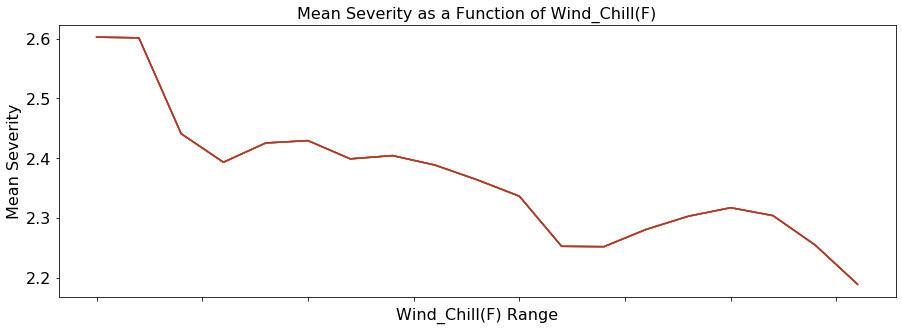

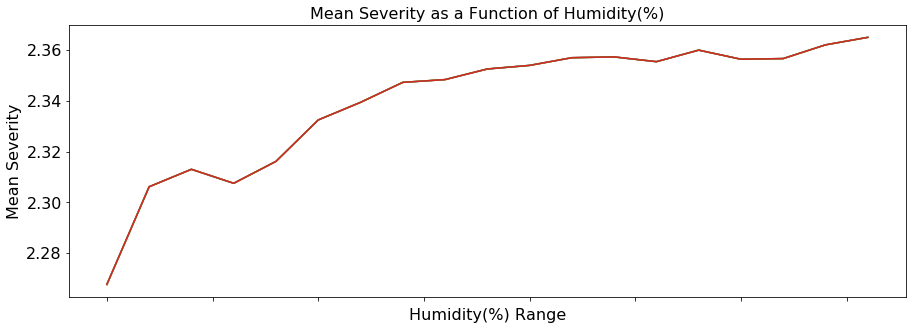

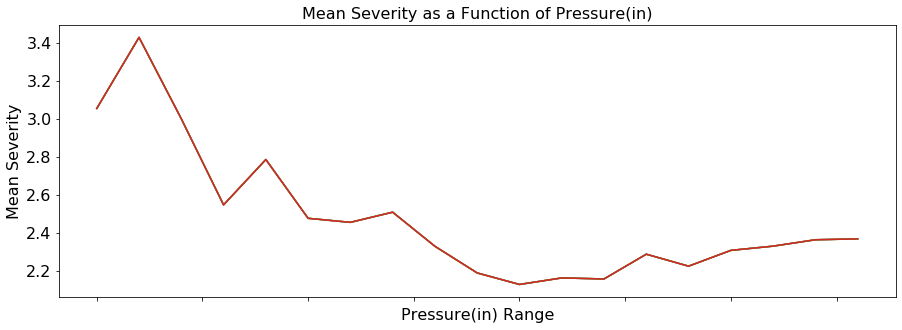

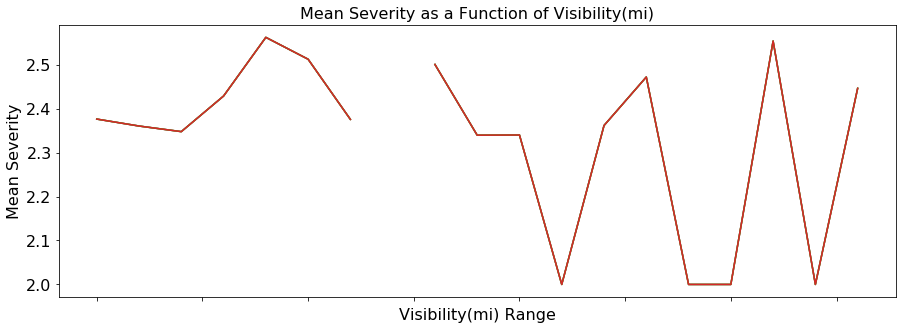

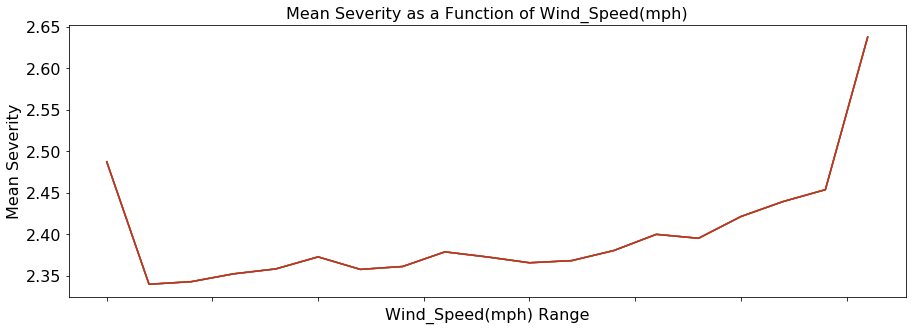

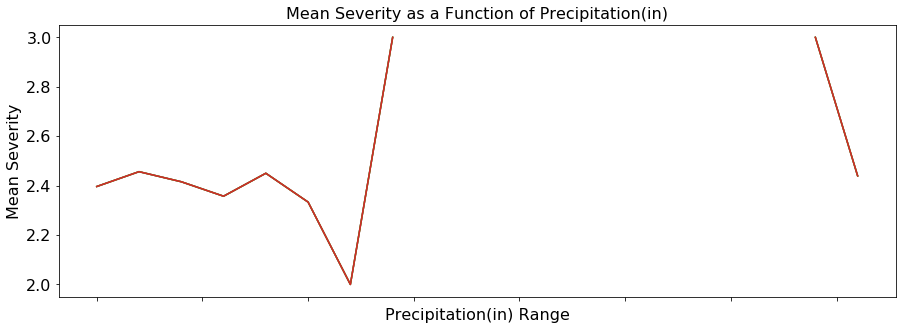

In [37]:
factors = ['Temperature(F)','Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

for factor in factors:
    # remove some of the extreme values
    factorMin = df[factor].quantile(q=0.0001)
    factorMax = df[factor].quantile(q=0.9999)
    # print df["Severity"].groupby(pd.cut(df[factor], np.linspace(factorMin,factorMax,num=20))).count()
    plt.subplots(figsize=(15,5))
    for s in np.arange(1,5):
        df["Severity"].groupby(pd.cut(df[factor], np.linspace(factorMin,factorMax,num=20))).mean().plot()
        plt.title("Mean Severity as a Function of " + factor, fontsize=16)
        plt.xlabel(factor + " Range", fontsize=16)
        plt.ylabel("Mean Severity", fontsize=16)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=16)

Mean severity increases as conditions for freezing precipitation increase, and as we saw in the previous section rain and snow have higher proportion of level 3 and 4 severity. These conditions include decreasing temperature, wind chill, and air pressure [1] as well as increasing humidity. Severity also increases as a function of wind speed. The data for visibility and precipitation is not complete.

[1] https://sciencing.com/rain-pressure-low-8738476.html

## Does the side have an affect on the severity?

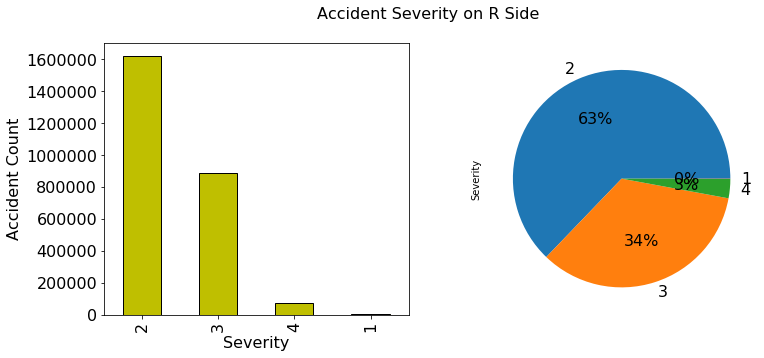

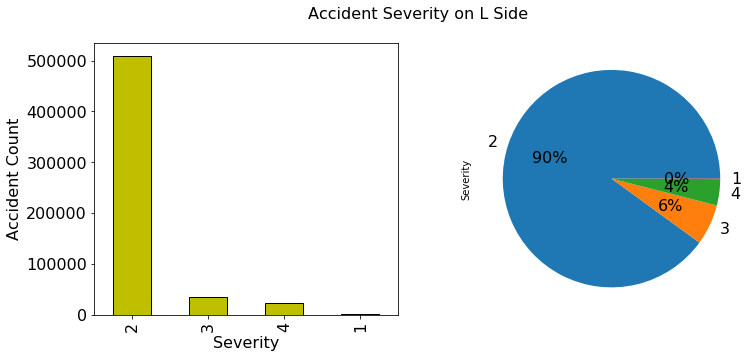

In [38]:
for s in ["R","L"]:
    plt.subplots(1,2,figsize=(12,5))
    plt.suptitle('Accident Severity on ' + s+" Side",fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["Side"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["Side"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

This graph suggests that the Left Side accidents are more likely to be less severe.

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

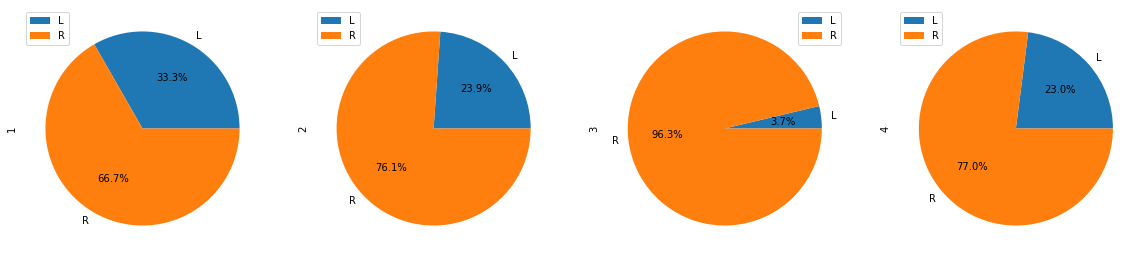

In [39]:
df['Side']=df['Side'].replace(' ','R')
df_s_s = df.groupby(['Side','Severity'])['ID'].count()
df_s_s = df_s_s.unstack('Severity')
df_s_s.plot(kind='pie',subplots=True,figsize=(20,10),autopct='%.1f%%')
plt.xticks(rotaion=90)

## Infrastracture

In this dataset, there are some boolean values that determines whether the accident happened near a traffic signal, stop sign, etc. We will See how proximity to an object affects the accident number and severity

<Figure size 432x288 with 0 Axes>

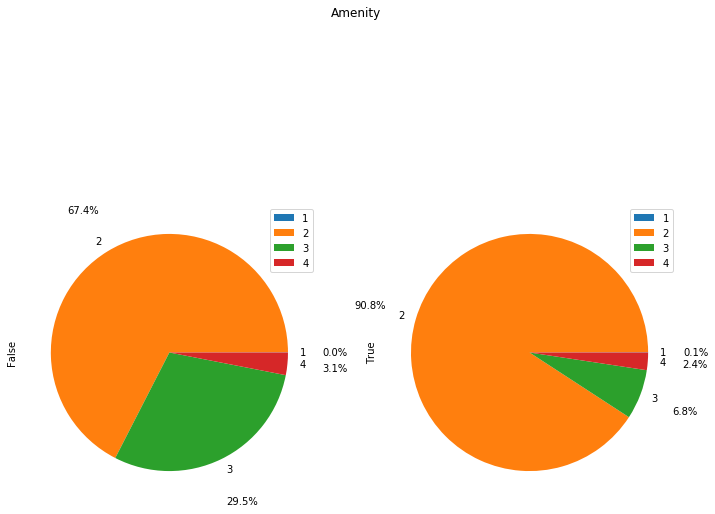

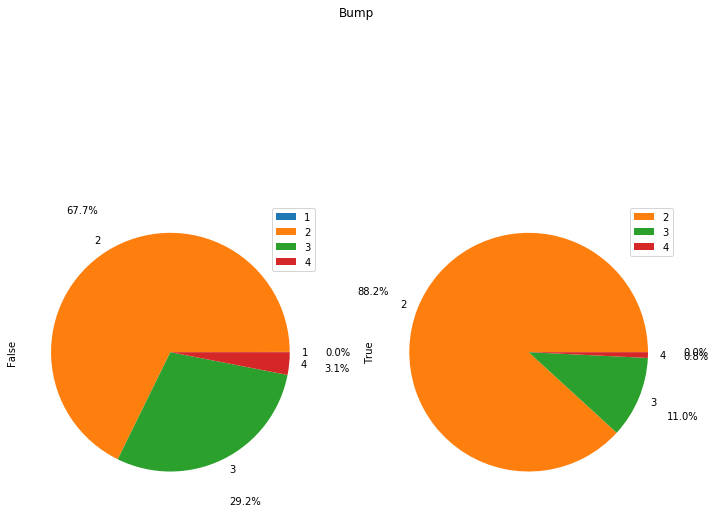

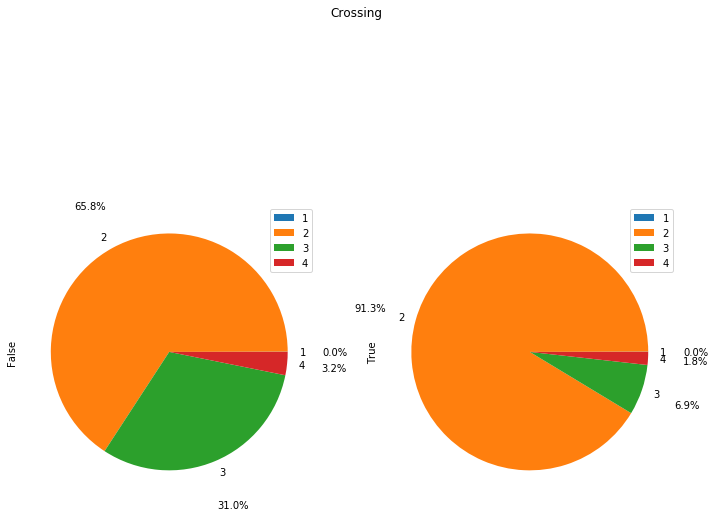

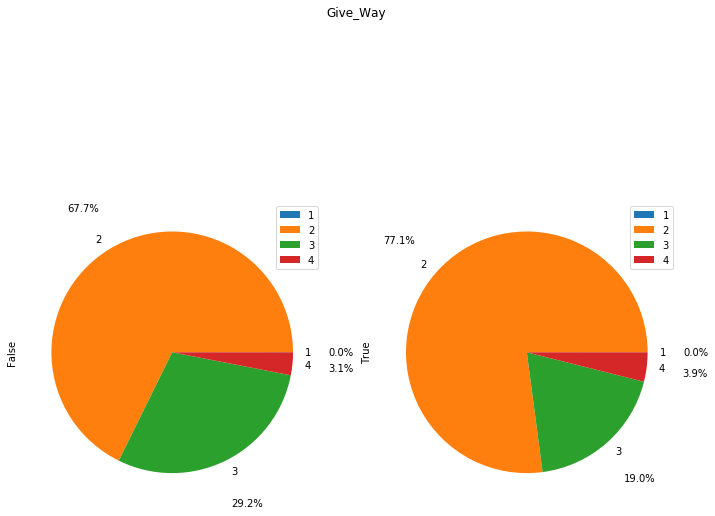

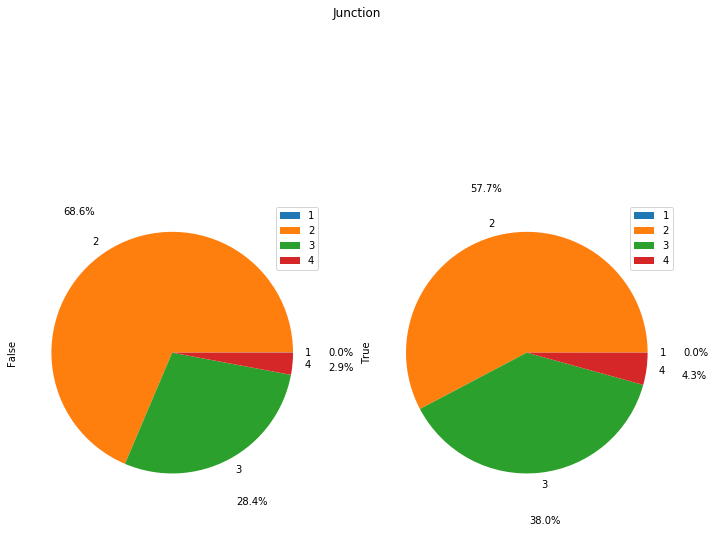

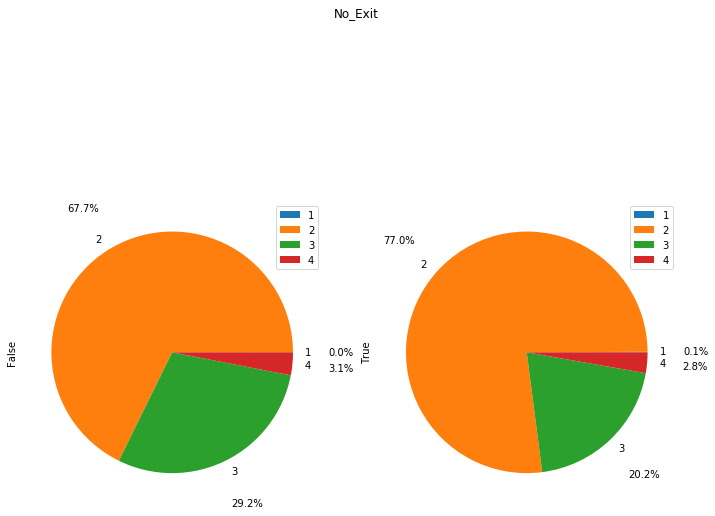

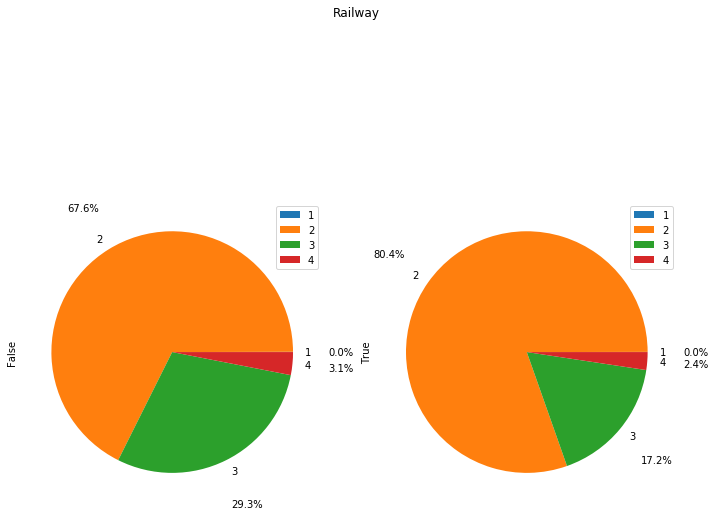

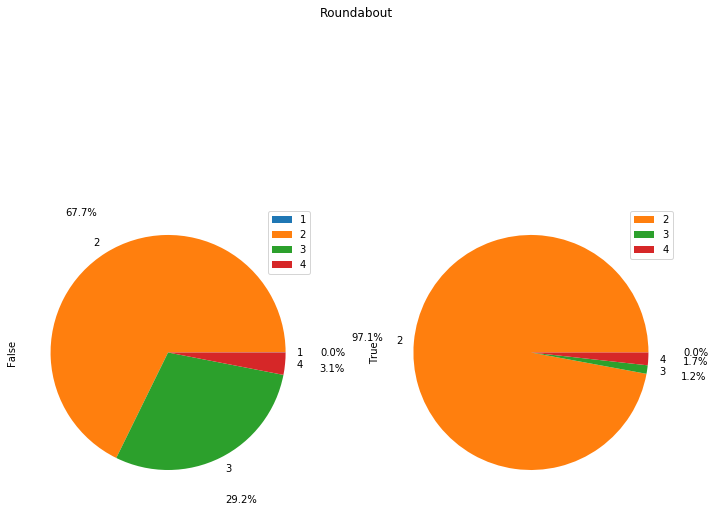

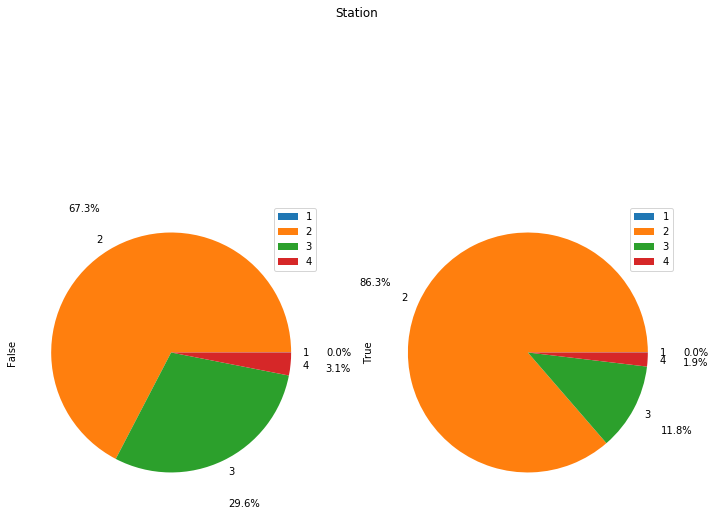

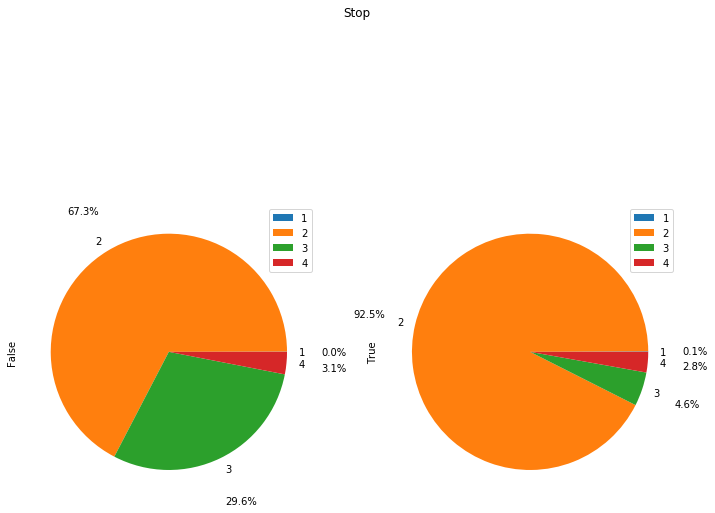

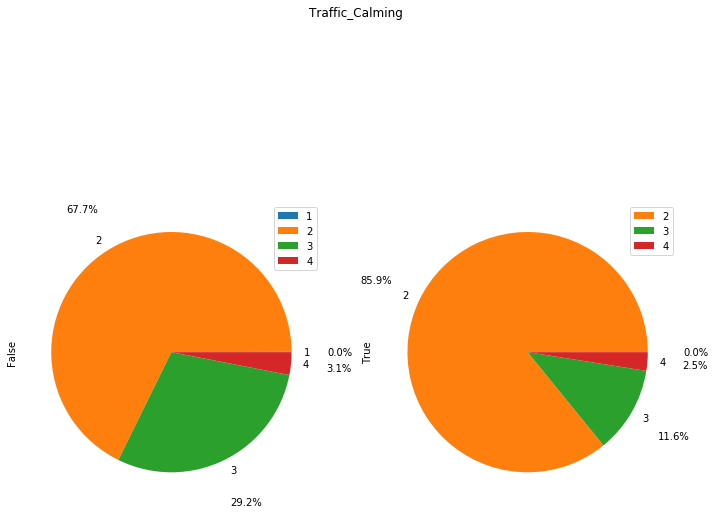

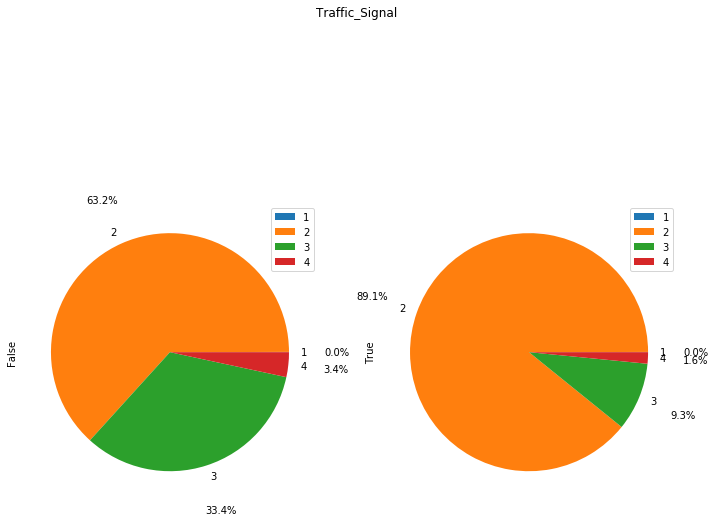

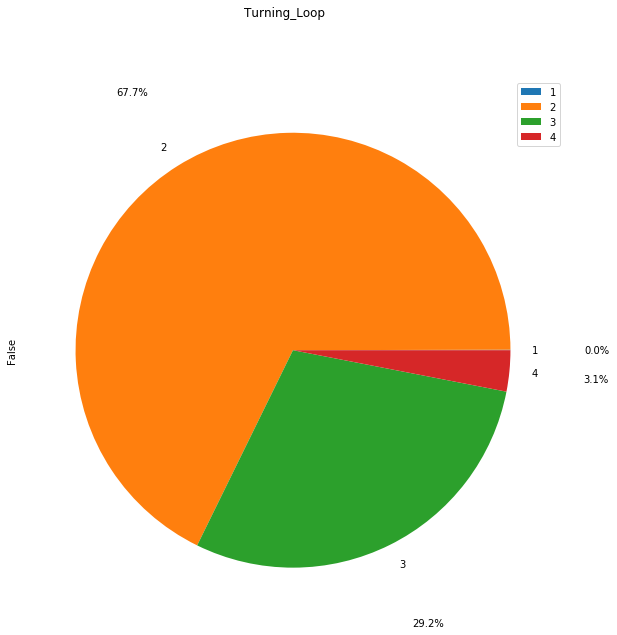

In [42]:
# Now we will check how the distribution of severity differs for True and False values for each booleans.
df_list=[]
def  bool_severity(col):
    df_bool = df.groupby([col,'Severity'])['ID'].count()
    df_bool = df_bool.unstack(col)
    df_list.append(df_bool)
for col in bool_cols:
    bool_severity(col)
for i in range(len(bool_cols)):
    plt.tight_layout()
    df_list[i].plot(kind='pie',subplots=True,autopct='%.1f%%',pctdistance=1.4,figsize=(10,10),title = bool_cols[i])

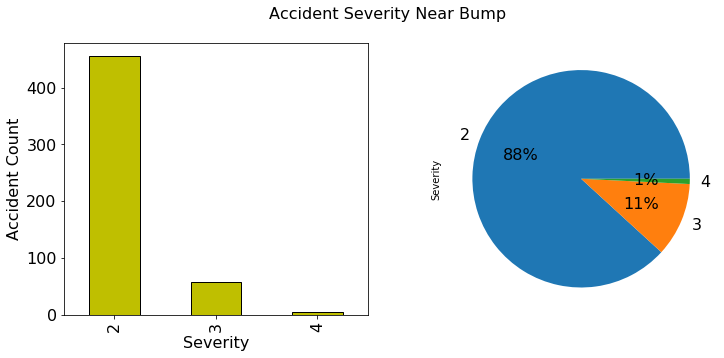

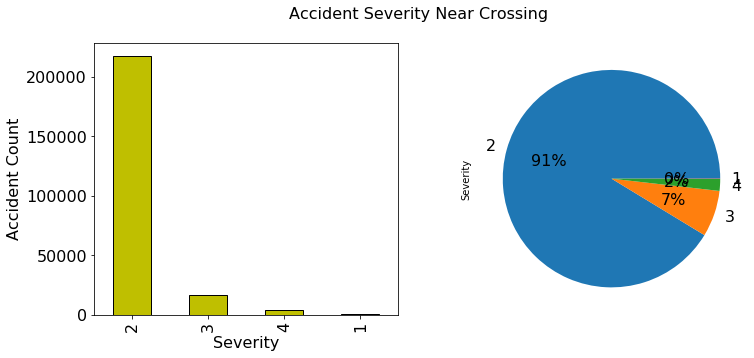

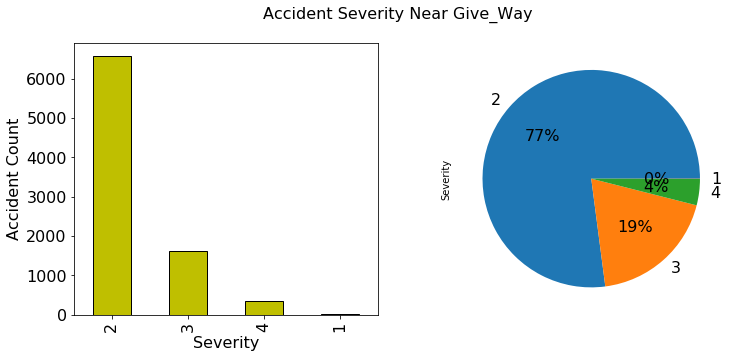

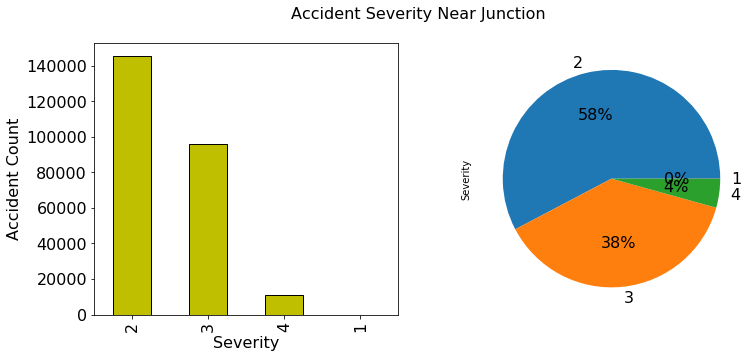

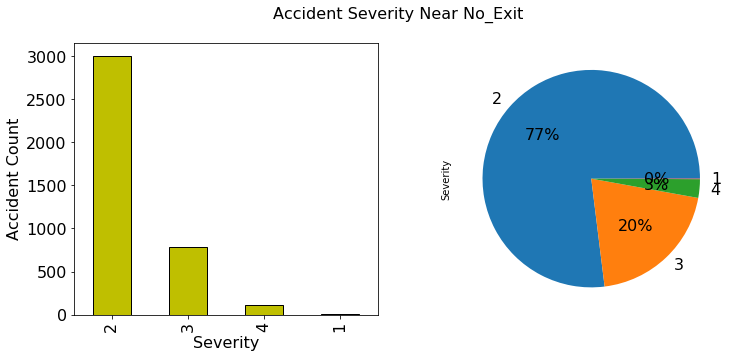

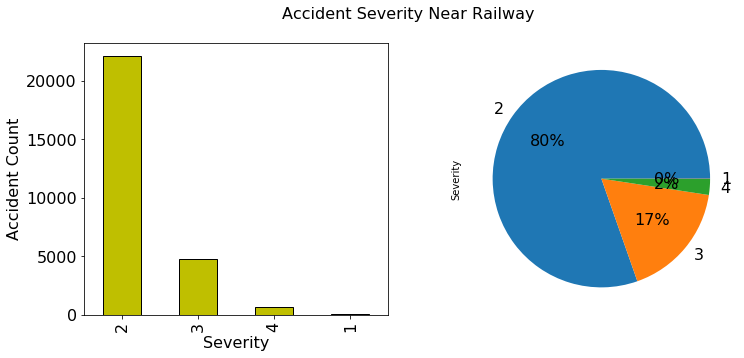

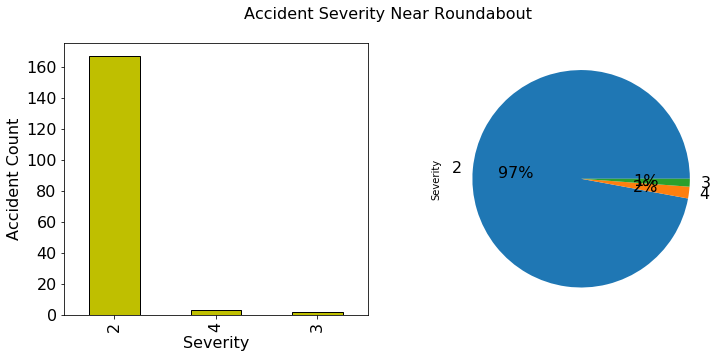

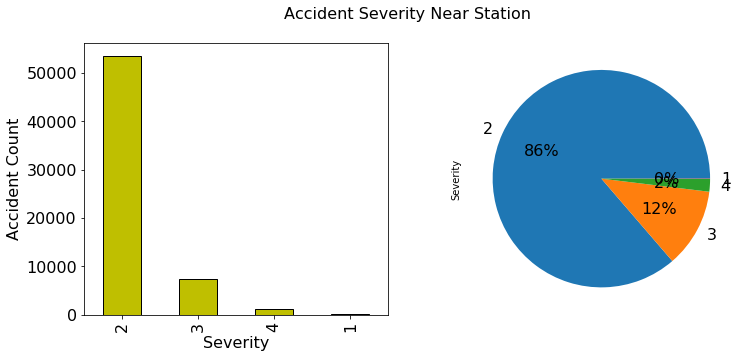

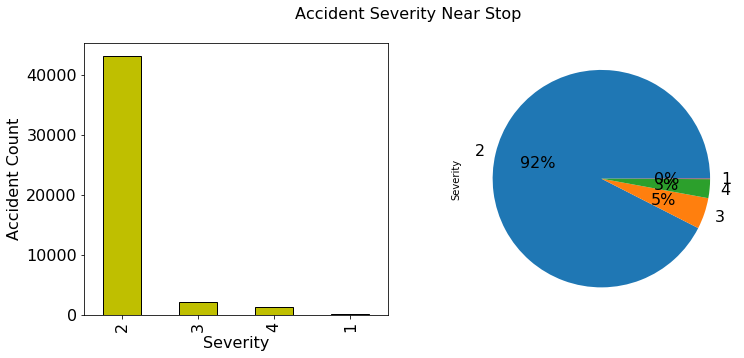

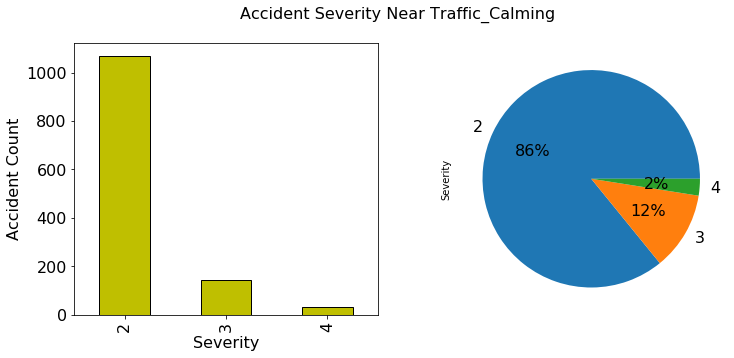

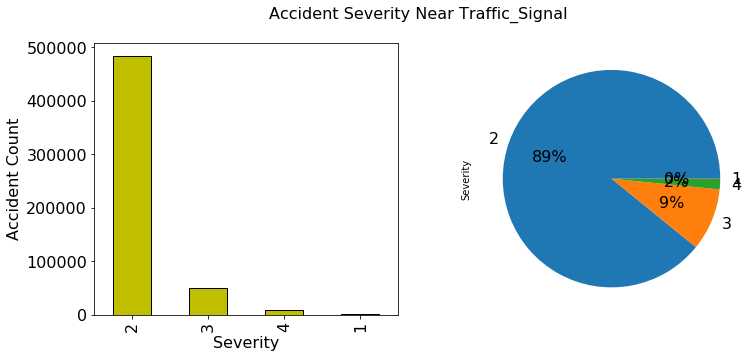

In [43]:
for s in ['Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']:
    # check if infrastructure type is found in any record 
    if (df[s] == True).sum() > 0:
        plt.subplots(1,2,figsize=(12,5))
        plt.xticks(fontsize=14)
        plt.suptitle('Accident Severity Near ' + s,fontsize=16)
        plt.subplot(1,2,1)
        df.loc[df[s] == True]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
        plt.xlabel('Severity',fontsize=16)
        plt.ylabel('Accident Count',fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.subplot(1,2,2)
        df.loc[df[s] == True]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

Junctions, give way, and no exit have the highest proportion of level 3 and level 4 severity accidents.